In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression as lr, Lasso as ls, Ridge as rg, ElasticNet as en, LogisticRegression as loglr
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsRegressor as knr, KNeighborsClassifier as knc
from sklearn.ensemble import RandomForestRegressor as rfr, GradientBoostingRegressor as gbr, RandomForestClassifier as rfc, GradientBoostingClassifier as gbc
from sklearn.preprocessing import Imputer, normalize, StandardScaler, MinMaxScaler, LabelBinarizer, RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.cross_validation import KFold, train_test_split as tts
from catboost import CatBoostRegressor as cbr
from sklearn.tree import DecisionTreeRegressor as dtr, DecisionTreeClassifier as dtc
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer as pst
mms = MinMaxScaler()
rc = RobustScaler()
ss = StandardScaler()

C:\Users\Visha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd

In [2]:
df_train = pd.read_csv('C:/Users/Visha/Downloads/TrainData.csv', header = 0, index_col = None)

In [71]:
df_train.head(7)

,SerialNumber,TimeStamp,Symbol,BestBuyOrderPrice,BestBuyOrderQuantity,BestSellOrderPrice,BestSellOrderQuantity,LastTradedPrice,TotalTradedQuantity,Difference
0,1,01-09-2017 09:15,XYZ Corporation,1173.05,26,1174.20,335,1173.00,2850,-309
1,2,01-09-2017 09:15,XYZ Corporation,1172.10,5,1172.95,21,1172.95,3049,-16
2,3,01-09-2017 09:15,XYZ Corporation,1172.00,163,1172.10,6,1172.00,3112,157
3,4,01-09-2017 09:15,XYZ Corporation,1172.00,23,1172.90,26,1172.00,3384,-3
4,5,01-09-2017 09:15,XYZ Corporation,1171.00,111,1171.05,9,1171.00,3579,102
5,6,01-09-2017 09:15,XYZ Corporation,1171.00,19,1171.95,26,1171.00,3731,-7
6,7,01-09-2017 09:15,XYZ Corporation,1171.55,98,1172.00,15,1172.00,3983,83


In [70]:
df_train['Difference'] = df_train.iloc[:, 4] - df_train.iloc[:, 6]

In [81]:
result_pos = df_train[df_train['Difference'] > 0]

In [82]:
result_pos.head(7)

,SerialNumber,TimeStamp,Symbol,BestBuyOrderPrice,BestBuyOrderQuantity,BestSellOrderPrice,BestSellOrderQuantity,LastTradedPrice,TotalTradedQuantity,Difference
2,3,01-09-2017 09:15,XYZ Corporation,1172.00,163,1172.10,6,1172.0,3112,157
4,5,01-09-2017 09:15,XYZ Corporation,1171.00,111,1171.05,9,1171.0,3579,102
6,7,01-09-2017 09:15,XYZ Corporation,1171.55,98,1172.00,15,1172.0,3983,83
7,8,01-09-2017 09:15,XYZ Corporation,1171.05,74,1171.45,5,1171.0,4165,69
9,10,01-09-2017 09:15,XYZ Corporation,1173.00,115,1173.05,1,1173.0,5104,114
10,11,01-09-2017 09:15,XYZ Corporation,1173.00,297,1173.75,26,1173.0,6046,271
12,13,01-09-2017 09:15,XYZ Corporation,1173.00,97,1173.05,10,1173.0,6483,87


In [83]:
result_neg = df_train[df_train['Difference'] < 0]

In [84]:
result_neg.head(7)

,SerialNumber,TimeStamp,Symbol,BestBuyOrderPrice,BestBuyOrderQuantity,BestSellOrderPrice,BestSellOrderQuantity,LastTradedPrice,TotalTradedQuantity,Difference
0,1,01-09-2017 09:15,XYZ Corporation,1173.05,26,1174.20,335,1173.00,2850,-309
1,2,01-09-2017 09:15,XYZ Corporation,1172.10,5,1172.95,21,1172.95,3049,-16
3,4,01-09-2017 09:15,XYZ Corporation,1172.00,23,1172.90,26,1172.00,3384,-3
5,6,01-09-2017 09:15,XYZ Corporation,1171.00,19,1171.95,26,1171.00,3731,-7
8,9,01-09-2017 09:15,XYZ Corporation,1171.00,15,1171.90,26,1171.00,4245,-11
15,16,01-09-2017 09:15,XYZ Corporation,1173.05,5,1173.85,26,1173.95,7249,-21
28,29,01-09-2017 09:15,XYZ Corporation,1173.00,116,1173.40,528,1173.00,9433,-412


In [85]:
result_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9937 entries, 2 to 16598
Data columns (total 10 columns):
SerialNumber             9937 non-null int64
TimeStamp                9937 non-null object
Symbol                   9937 non-null object
BestBuyOrderPrice        9937 non-null float64
BestBuyOrderQuantity     9937 non-null int64
BestSellOrderPrice       9937 non-null float64
BestSellOrderQuantity    9937 non-null int64
LastTradedPrice          9937 non-null float64
TotalTradedQuantity      9937 non-null int64
Difference               9937 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 854.0+ KB


In [80]:
result_pos.Difference.mean()

510.09238200664186

In [86]:
result_neg.Difference.mean()

-152.0594535858429

In [87]:
result_pos.Difference.median()

122.0

In [88]:
result_neg.Difference.median()

-47.0

In [66]:
ind = sup_dem.loc[sup_dem > 0].index
ind_1 = list(map(int, ind))
ind_1[0]

2

In [67]:
sup_dem_1 = []
for i in ind_1:
    sup_dem_1.append(df_train.iloc[i, 7])

In [62]:
sup_dem['Difference'] = sup_dem_1

In [68]:
sup_dem.head()

0   -309
1    -16
2    157
3     -3
4    102
dtype: int64

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16599 entries, 0 to 16598
Data columns (total 10 columns):
SerialNumber             16599 non-null int64
TimeStamp                16599 non-null object
Symbol                   16599 non-null object
BestBuyOrderPrice        16599 non-null float64
BestBuyOrderQuantity     16599 non-null int64
BestSellOrderPrice       16599 non-null float64
BestSellOrderQuantity    16599 non-null int64
LastTradedPrice          16599 non-null float64
TotalTradedQuantity      16599 non-null int64
Difference               16599 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.4+ MB


In [13]:
df_train.corr(method = 'spearman')

,SerialNumber,BestBuyOrderPrice,BestBuyOrderQuantity,BestSellOrderPrice,BestSellOrderQuantity,LastTradedPrice,TotalTradedQuantity
SerialNumber,1.000000,0.884320,-0.072322,0.879528,0.070504,0.881199,0.999691
BestBuyOrderPrice,0.884320,1.000000,-0.122959,0.994449,0.078503,0.995410,0.884633
BestBuyOrderQuantity,-0.072322,-0.122959,1.000000,-0.106227,-0.006021,-0.113100,-0.071977
BestSellOrderPrice,0.879528,0.994449,-0.106227,1.000000,0.085065,0.993732,0.879175
BestSellOrderQuantity,0.070504,0.078503,-0.006021,0.085065,1.000000,0.079372,0.070649
LastTradedPrice,0.881199,0.995410,-0.113100,0.993732,0.079372,1.000000,0.880845
TotalTradedQuantity,0.999691,0.884633,-0.071977,0.879175,0.070649,0.880845,1.000000


In [9]:
df_train.columns

Index(['nSerialNumber', 'TimeStamp', 'sSymbol', 'nBestBuyOrderPrice',
       'nBestBuyOrderQuantity', 'nBestSellOrderPrice',
       'nBestSellOrderQuantity', 'nLastTradedPrice', 'nTotalTradedQuantity'],
      dtype='object')

In [11]:
df_train.rename(index = str, columns = {"nSerialNumber": "SerialNumber" , "sSymbol": "Symbol", "nBestBuyOrderPrice": "BestBuyOrderPrice", "nBestBuyOrderQuantity": "BestBuyOrderQuantity" , "nBestSellOrderPrice": "BestSellOrderPrice", "nBestSellOrderQuantity": "BestSellOrderQuantity", "nLastTradedPrice": "LastTradedPrice", "nTotalTradedQuantity": "TotalTradedQuantity"}, inplace = 1)

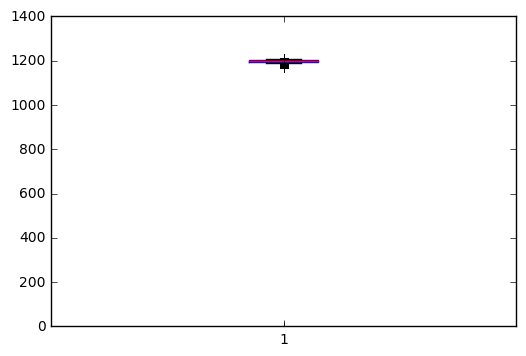

In [24]:
plt.boxplot(df_train.BestBuyOrderPrice)
plt.show()

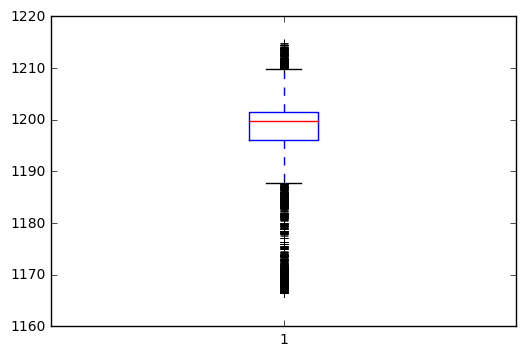

In [23]:
plt.boxplot(df_train.BestSellOrderPrice)
plt.show()

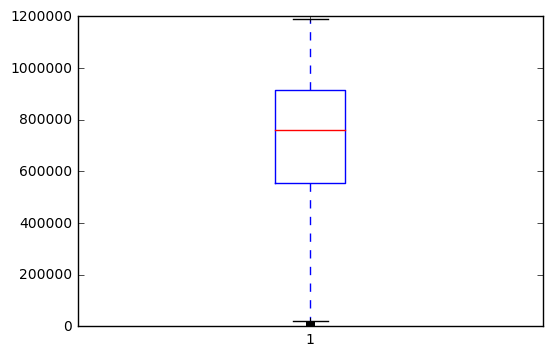

In [25]:
plt.boxplot(df_train.TotalTradedQuantity)
plt.show()

In [89]:
df_train.TotalTradedQuantity.mean()

711999.5779263811

In [90]:
df_train.TotalTradedQuantity.median()

759591.0

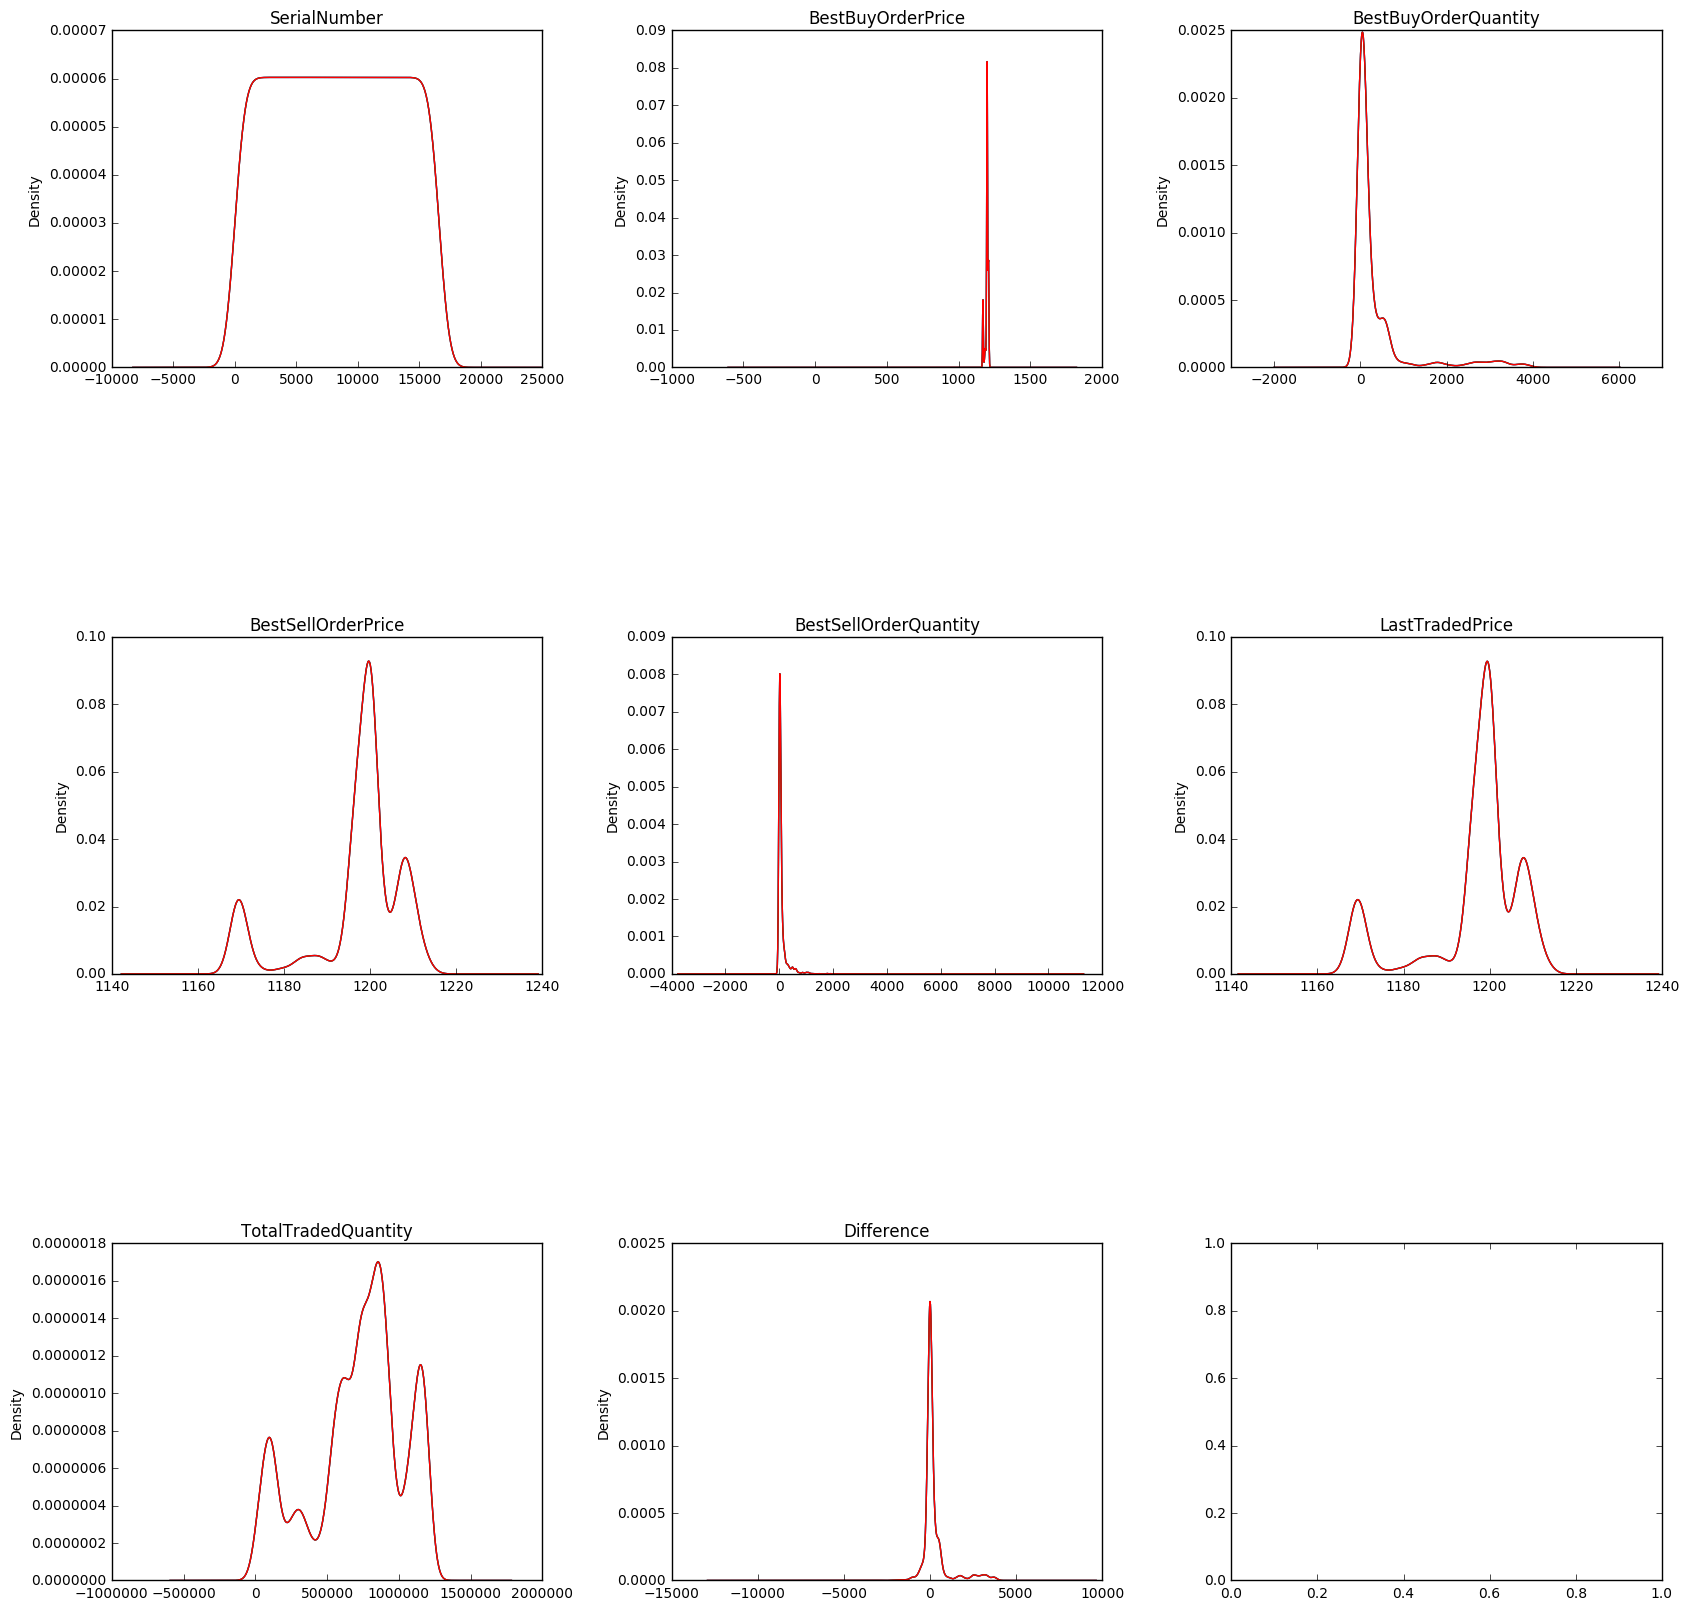

In [96]:

%matplotlib inline


num_df = df_train.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(3,3, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

In [388]:
X = df_train[['BestBuyOrderQuantity', 'BestBuyOrderPrice', 'BestSellOrderPrice', 'TotalTradedQuantity']]
y = df_train['LastTradedPrice']

In [389]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .30)

In [390]:
clf1 = lr()

In [391]:
clf1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [392]:
np.sqrt(metrics.mean_squared_error(y_test, clf1.predict(X_test)))

0.26403039358336722

In [346]:
clf2 = en(alpha = 1, l1_ratio = .5, random_state = 1, selection = 'random')

In [347]:
clf2.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='random', tol=0.0001, warm_start=False)

In [348]:
np.sqrt(metrics.mean_squared_error(y_test, clf2.predict(X_test)))

0.35054892719635233

In [349]:
clf3 = ls(random_state = 1, selection = 'random')

In [350]:
clf3.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='random', tol=0.0001, warm_start=False)

In [351]:
np.sqrt(metrics.mean_squared_error(y_test, clf3.predict(X_test)))

0.41108234487368328

In [352]:
clf4 = rg(solver = 'lsqr')

In [353]:
clf4.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [354]:
np.sqrt(metrics.mean_squared_error(y_test, clf4.predict(X_test)))

4.4950815255544541

In [355]:
clf5 = svm.SVR(kernel = 'rbf', cache_size = 10000000, gamma = 5)

In [356]:
clf5.fit(X_train, y_train)

SVR(C=1.0, cache_size=10000000, coef0=0.0, degree=3, epsilon=0.1, gamma=5,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [357]:
np.sqrt(metrics.mean_squared_error(y_test, clf5.predict(X_test)))

11.261813197534149

In [358]:
clf6 = dtr(splitter = 'random', max_features = 'log2', random_state = 0)

In [359]:
clf6.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='random')

In [360]:
np.sqrt(metrics.mean_squared_error(y_test, clf6.predict(X_test)))

0.33415426066663467

In [393]:
clf7 = gbr(random_state = 1, loss = 'ls')

In [394]:
clf7.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [395]:
np.sqrt(metrics.mean_squared_error(y_test, clf7.predict(X_test)))

0.239862621829909

In [401]:
clf8 = rfr(n_estimators = 10, random_state = 1, max_features = 2)

In [402]:
clf8.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [403]:
np.sqrt(metrics.mean_squared_error(y_test, clf8.predict(X_test)))

0.18560291371316795

In [385]:
clf9 = knr(weights = 'uniform', algorithm = 'auto', n_neighbors = 3)

In [386]:
clf9.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [387]:
np.sqrt(metrics.mean_squared_error(y_test, clf9.predict(X_test)))

0.23014034966603042

In [337]:
df_test = pd.read_csv('C:/Users/Visha/Downloads/TestData.csv', header = 0, index_col = None)

In [338]:
X_test = df_test[['nBestBuyOrderPrice', 'nBestSellOrderPrice', 'nTotalTradedQuantity']]

In [339]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82748 entries, 0 to 82747
Data columns (total 3 columns):
nBestBuyOrderPrice      82748 non-null float64
nBestSellOrderPrice     82748 non-null float64
nTotalTradedQuantity    82748 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.9 MB


In [13]:
ks = pd.read_csv('C:/users/visha/desktop/iitm.csv', header = None, sep = ':::')

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [14]:
ks.head()

,0,1
0,RefEmail,vishal.subedi@gmail.com
1,Application No,MA18SFP0178


In [340]:
pd.DataFrame({"nLastTradedPrice": clf8.predict(X_test)}).to_csv('submission.csv', index = 0, header = 1)